
# Aproximações Trigonométricas


## Caso discreto

In [ ]:
# Bibliotecas utilizadas

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from IPython.display import *

In [ ]:
# Demonstrando a definição de x de k

x_k = sp.Function('x_k')                       # Definimos x de k como um função sympy
k_definicao = sp.Symbol('k = 1, 2, 3, ..., N')   # A definição de k como sendo os pontos de 1 até N
N, k= symbols('N, k')                           # Definindo N e k como símbolos sympy

x_k = (2*k*sp.pi)/N         # Você pode montar qualquer função que quiser, vamos supor que seja essa

display(Eq(symbols('x_k'), x_k))    # Imprimindo a definição
display(HTML("<p></p>"))            # Quebra de linha
k_definicao                         # Quantidade de pontos

In [ ]:
# Demonstrando a definição da aproximação polinomial para equações periódicas

L, x = symbols('N, L, x')                # Definição de L e x como símbolos sympy
a0, a1, a2, aL = symbols('a0, a1, a2, aL')   # Definição dos coeficientes a0, a1, a2 e aL como símbolos sympy
b1, b2, b3, bL = symbols('b1, b2, b3, bL')    # Definição dos coeficientes b1, b2, b3 e bl como símbolos sympy

F_L = a0 + a1*sp.cos(x) + b1*sp.sin(x) + a2*sp.cos(2*x) + b2*sp.sin(2*x) + aL*sp.cos(L*x) + bL*sp.sin(L*x)    # Definição da aproximação linear periódica

display(Eq(symbols('F_{L}(x)'), F_L))       # Imprimindo a combinação linear
display(HTML("<p></p>"))                    # Quebra de linha
display(Le(L, N/2))                         # Imprimindo a condição de periodicidade

In [ ]:
# Demonstrando as equações dos coeficientes da aproximação

a0 = sp.Function('a0')                               # Definindo a0, ai, bi como funções sympy
ai = sp.Function('a_i')
bi = sp.Function('b_i')
N, k, xk, y, i = symbols('N, k, x_k, f(x_{k}), i')   # Definindo N, k, x_k, y (que é a imagem de x de k), e i (ordem) como símbolos sympy
i_definicao = sp.Symbol('i = 1, 2, ..., L')          # Definição de i como os valores até a ordem L

a0 = 1/N*sp.Sum(y, (k, 1, N))                        # Fórmulas de a0, ai e bi
ai = 2/N*sp.Sum(y*sp.cos(i*xk), (k, 1, N))
bi = 2/N*sp.Sum(y*sp.sin(i*xk), (k, 1, N))

display(Eq(symbols('a_0'), a0))                      # Imprimindo as equações
display(HTML("<p></p>"))
display(Eq(symbols('a_i'), ai))
display(HTML("<p></p>"))
display(Eq(symbols('b_i'), bi))
display(HTML("<p></p>"))
i_definicao                                          # Quantidade de pontos

In [ ]:
# Calculando usando dados
# OBS: Coloque os dados no dicionário data abaixo

a0 = sp.Function('a0')              # Definindo os coeficientes e a equação da aproximação como funções sympy
ai = sp.Function('a_i')
bi = sp.Function('b_i')
Fi = sp.Function('F_i(x)')
x = sp.Symbol('x')                  # Definindo x como as "voltas" no círculo trigonométrico até a ordem

soma_ai = 0                         # Fazemos os somatórios dos coeficientes ai e bi separadamente
soma_bi = 0

ai_values = []                      # Organizamos os valores dos coeficientes em uma lista
bi_values = []

data = {
    'x': [pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 7*pi/4, 2*pi], # Valores de x de k
    'f(x)': [126, 159, 191, 178, 183, 179, 176, 149],  # Valores da imagem de x de k
    'N': 8,   # Quantidade de pontos        OBS: Tem que ser condizente com os dados de x e f(x) colocados, se N = 8 é porque há 8 valores de x e f(x), grato.
    'L': 1    # Ordem da aproximação
}

a0 = 1/data['N']*sp.Add(*data['f(x)']) # Coeficiente a0
display(Eq(symbols('a_0'), a0))        # Imprimindo o coeficiente
display(HTML("<p></p>"))               # Quebra de linha

for j in range(1, data['L']+1, 1):     # Imprimindo todos os coeficientes ai até o valor da ordem
  for i in range(0, data['N'], 1):
    soma_ai += (data['f(x)'][i]*sp.cos(j*data['x'][i]))  # Fazemos o somatório separadamente para ficar mais intuitivo (e fácil tbm ne)
    ai = (2/data['N'])*soma_ai
    if i == data['N']-1:
      ai_values.append(ai)                               # Adicionamos os valores de ai numa lista para montar a equação final
      display(Eq(symbols('a_i'), ai))
      display(HTML("<p></p>"))
      display(Eq(sp.Symbol('i'), j))
      soma_ai = 0

for j in range(1, data['L']+1, 1):     # Imprimindo todos os coeficientes bi até o valor da ordem
  for i in range(0, data['N'], 1):
    soma_bi += (data['f(x)'][i]*sp.sin(j*data['x'][i]))  # Fazemos o somatório separadamente para ficar mais intuitivo
    bi = (2/data['N'])*soma_bi
    if i == data['N']-1:
      bi_values.append(bi)                               # Adicionamos os valores de bi numa lista para montar a equação final
      display(Eq(symbols('b_i'), bi))
      display(HTML("<p></p>"))
      display(Eq(sp.Symbol('i'), j))
      soma_bi = 0

Fi = a0                                                  # A equação final sempre inicia com o coeficiente a0

for i in range(0, data['L'], 1):
  Fi += ai_values[i]*sp.cos(x) + bi_values[i]*sp.sin(x)
  if i == data['L']-1:
    display(Eq(symbols('F_{L}(x)'), Fi))                # Imprimindo a equação final


Eq(a_0, 167.625)

Eq(a_i, -9.0*sqrt(2) - 7.25)

Eq(i, 1)

Eq(b_i, -5.25*sqrt(2) - 5.0)

Eq(i, 1)

Eq(F_{L}(x), (-5.25*sqrt(2) - 5.0)*sin(x) + (-9.0*sqrt(2) - 7.25)*cos(x) + 167.625)

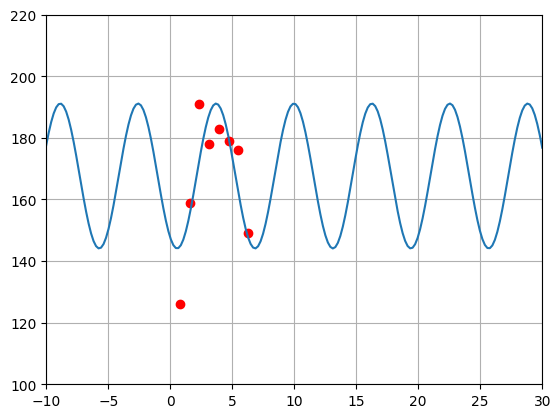

In [ ]:
# Plotando o gráfico da aproximação

fig, ax = plt.subplots()

ax.set_xlim(-10, 30)
ax.set_ylim(100, 220)

ax.grid(True)

for i in range(0, data['N'], 1):
  ax.plot(data['x'][i], data['f(x)'][i], 'ro')

t_vals = np.linspace(-10, 30, 200)
Fi_vals = []

for i in range(0, len(t_vals), 1):
  Fi_vals.append(Fi.subs(x, t_vals[i]))

ax.plot(t_vals, Fi_vals)

plt.show()